0.9508827268452446


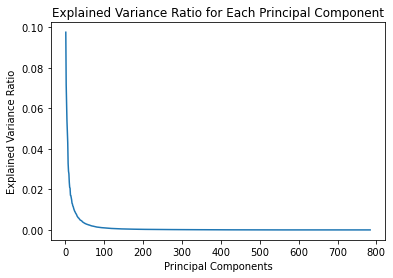

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#REading the data and storing them into the x and y variables.

train_dataset=pd.read_csv('/kaggle/input/mnist-testing/train.csv')

y=train_dataset.iloc[:,0].values
x=train_dataset.iloc[:,1:].values

#Performing principal component analysis on the dataset

from sklearn.decomposition import PCA
pca=PCA(n_components=784)
datavar=pca.fit_transform(x)
array=[]
for i in range(784):
    array.append(i+1)

ratio=0
for i in range(155):
    ratio=ratio+pca.explained_variance_ratio_[i]
print(ratio)
plt.title('Explained Variance Ratio for Each Principal Component')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.plot(array,pca.explained_variance_ratio_)
plt.show()

0.734
0.9191428571428572
0.9473571428571429
0.959
0.9623571428571429
0.9652142857142857
0.9639285714285715
0.9609285714285715
0.9568571428571429
0.9557142857142857
0.9532142857142857
0.9497857142857142
0.9483571428571429
0.9445714285714286
0.9441428571428572
0.9397857142857143
0.9367857142857143
0.933
0.9288571428571428
0.9258571428571428
0.9221428571428572
0.9156428571428571
0.9112142857142858
0.9078571428571428
0.9032857142857142
0.9000714285714285
0.8949285714285714
0.8902857142857142
0.8824285714285715
0.8776428571428572


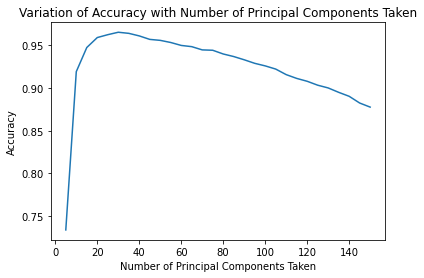

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#REading the data and storing them into the x and y variables.

accuracy=[]
pcs_taken=[]
for i in range(30):
    pcs_taken.append((i+1)*5)
    
for i in range(len(pcs_taken)):

    train_dataset=pd.read_csv('/kaggle/input/mnist-testing/train.csv')
    
    y=train_dataset.iloc[:,0].values
    x=train_dataset.iloc[:,1:].values
    
    #Performing principal component analysis on the dataset
    
    from sklearn.decomposition import PCA
    pca=PCA(n_components=pcs_taken[i])
    datavar=pca.fit_transform(x)
    
    #Normalizing the principal components
    
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    normalized_datavar = sc.fit_transform(datavar)
    
    #Splitting the data obtained from PCA into training data and testing data
    
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(normalized_datavar, y, test_size = 1/3, random_state = 0)
    
    #Classifying the test number images using the KNN Classifier
    
    from sklearn.neighbors import KNeighborsClassifier
    classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
    classifier.fit(x_train,y_train)
    
    #Calculate the predicted values as per the parameters calculated by our training model.
    
    y_pred = classifier.predict(x_test)
    
    #Calculation of acuracy by comparing each predicted and actual value.
    
    num_correct=0
    for i in range(len(y_pred)):
        if(y_pred[i]==y_test[i]):
            num_correct=num_correct+1 
    
    print(num_correct/len(y_pred)) 
    accuracy.append(num_correct/len(y_test))

plt.plot(pcs_taken,accuracy)
plt.title('Variation of Accuracy with Number of Principal Components Taken')
plt.xlabel('Number of Principal Components Taken')
plt.ylabel('Accuracy')
plt.show()
      

0.3605714285714286
0.589
0.6571428571428571
0.7366428571428572
0.7519285714285714
0.7637142857142857
0.7752857142857142
0.7836428571428572
0.7927142857142857
0.7955
0.8041428571428572
0.8067142857142857
0.8085
0.8104285714285714
0.8115
0.8141428571428572
0.8181428571428572
0.8173571428571429
0.8170714285714286
0.8179285714285714
0.8182857142857143
0.8192857142857143
0.8192857142857143
0.8195
0.8222142857142857
0.8206428571428571
0.8225
0.8215
0.8215
0.8222142857142857


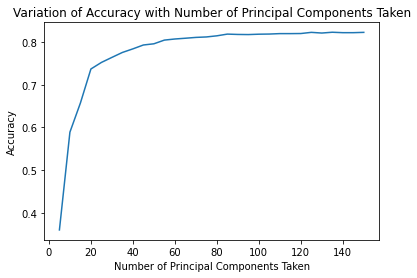

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

accuracy=[]
pcs_taken=[]
for i in range(30):
    pcs_taken.append((i+1)*5)

for i in range(len(pcs_taken)):
    train_dataset=pd.read_csv('/kaggle/input/mnist-testing/train.csv')
    
    y=train_dataset.iloc[:,0].values
    x=train_dataset.iloc[:,1:].values
    
    from sklearn.decomposition import PCA
    pca=PCA(n_components=pcs_taken[i])
    datavar=pca.fit_transform(x)
    
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    normalized_datavar = sc.fit_transform(datavar)
    
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    normalized_datavar = sc.fit_transform(datavar)
    
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(normalized_datavar, y, test_size = 1/3, random_state = 0)
    
    y_train_values=[]
    for i in range(10):
        train_values=[]
        for value in y_train:
            if(value==i):
                train_values.append(1)
            else:
                train_values.append(0)
        y_train_values.append(train_values)
    y_test_values=[]
    for i in range(10):
        test_values=[]
        for value in y_test:
            if(value==i):
                test_values.append(1)
            else:
                test_values.append(0)
        y_test_values.append(test_values)
        
    from sklearn.linear_model import LogisticRegression
    classifier = LogisticRegression(random_state = 0)
    y_pred_values=[]
    for i in range(10): 
        classifier.fit(x_train, y_train_values[i])
        y_pred_values.append(classifier.predict(x_test))
    
    y_pred=[]
    for i in range(len(y_pred_values[0])):
        numbers=[]
        for j in range(10):
            if(y_pred_values[j][i]==1):
                numbers.append(j)
        if(len(numbers)==0):
            numbers.append(-1)
        y_pred.append(numbers)
        
    num_correct=0 
    for i in range(len(y_test)):
        if(len(y_pred[i])==1 and y_pred[i][0]==y_test[i]):
            num_correct=num_correct+1
            
    print(num_correct/len(y_test))
    accuracy.append(num_correct/len(y_test))

plt.plot(pcs_taken,accuracy)
plt.title('Variation of Accuracy with Number of Principal Components Taken')
plt.xlabel('Number of Principal Components Taken')
plt.ylabel('Accuracy')
plt.show()


0.649
0.7760714285714285
0.8124285714285714
0.8475714285714285
0.8593571428571428
0.8632857142857143
0.867
0.869
0.8734285714285714
0.875
0.8747142857142857
0.8751428571428571
0.8768571428571429
0.877
0.8780714285714286
0.8764285714285714
0.8756428571428572
0.8743571428571428
0.8745
0.8702857142857143
0.8696428571428572
0.8700714285714286
0.8694285714285714
0.8670714285714286
0.8669285714285714
0.8651428571428571
0.8625714285714285
0.8618571428571429
0.8621428571428571
0.8599285714285714


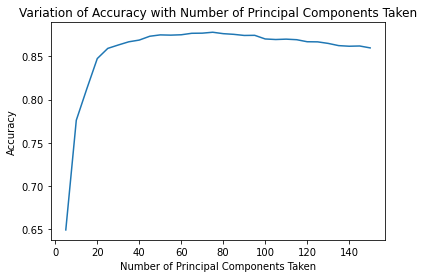

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

accuracy=[]
pcs_taken=[]
for i in range(30):
    pcs_taken.append((i+1)*5)
    
for i in range(len(pcs_taken)):
    #REading the data and storing them into the x and y variables.
    
    train_dataset=pd.read_csv('/kaggle/input/mnist-testing/train.csv')
    
    y=train_dataset.iloc[:,0].values
    x=train_dataset.iloc[:,1:].values
    
    #Performing principal component analysis on the dataset
    
    from sklearn.decomposition import PCA
    pca=PCA(n_components=pcs_taken[i])
    datavar=pca.fit_transform(x)
    
    #Normalizing the principal components
    
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    normalized_datavar = sc.fit_transform(datavar)
    
    #Splitting the data obtained from PCA into training data and testing data
    
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(normalized_datavar, y, test_size = 1/3, random_state = 0)
    
    #Classifying the test number images using the naive bayes Classifier
    
    from sklearn.naive_bayes import GaussianNB
    classifier = GaussianNB()
    classifier.fit(x_train, y_train)
    
    #Calculate the predicted values as per the parameters calculated by our training model.
    
    y_pred = classifier.predict(x_test)
    
    #Calculation of acuracy by comparing each predicted and actual value.
    
    num_correct=0
    for i in range(len(y_pred)):
        if(y_pred[i]==y_test[i]):
            num_correct=num_correct+1 
    
    print(num_correct/len(y_pred))   
    accuracy.append(num_correct/len(y_test))

plt.plot(pcs_taken,accuracy)
plt.title('Variation of Accuracy with Number of Principal Components Taken')
plt.xlabel('Number of Principal Components Taken')
plt.ylabel('Accuracy')
plt.show()    

0.5458571428571428
0.7281428571428571
0.7455
0.7509285714285714
0.7476428571428572
0.7445
0.7447142857142857
0.7415714285714285
0.7380714285714286
0.7357142857142858
0.732
0.7348571428571429
0.7307142857142858
0.7259285714285715
0.7315714285714285
0.7305
0.7267857142857143
0.7246428571428571
0.7225714285714285
0.7233571428571428
0.7234285714285714
0.7246428571428571
0.7235714285714285
0.7208571428571429
0.7197857142857143
0.7213571428571428
0.7175714285714285
0.7220714285714286
0.7180714285714286
0.7157142857142857


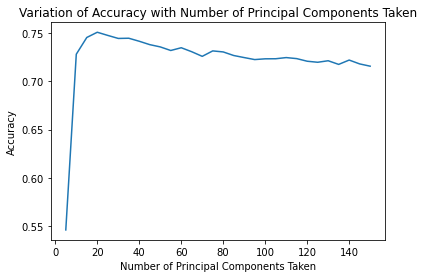

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

accuracy=[]
pcs_taken=[]
for i in range(30):
    pcs_taken.append((i+1)*5)
    
for i in range(len(pcs_taken)):

    train_dataset=pd.read_csv('/kaggle/input/mnist-testing/train.csv')
    
    y=train_dataset.iloc[:,0].values
    x=train_dataset.iloc[:,1:].values
    
    from sklearn.decomposition import PCA
    pca=PCA(n_components=pcs_taken[i])
    datavar=pca.fit_transform(x)
    
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    normalized_datavar = sc.fit_transform(datavar)
    
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    normalized_datavar = sc.fit_transform(datavar)
    
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(normalized_datavar, y, test_size = 1/3, random_state = 0)
    
    y_train_values=[]
    for i in range(10):
        train_values=[]
        for value in y_train:
            if(value==i):
                train_values.append(1)
            else:
                train_values.append(0)
        y_train_values.append(train_values)
    y_test_values=[]
    for i in range(10):
        test_values=[]
        for value in y_test:
            if(value==i):
                test_values.append(1)
            else:
                test_values.append(0)
        y_test_values.append(test_values)
        
    from sklearn.tree import DecisionTreeClassifier
    classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    y_pred_values=[]
    for i in range(10): 
        classifier.fit(x_train, y_train_values[i])
        y_pred_values.append(classifier.predict(x_test))
    
    y_pred=[]
    for i in range(len(y_pred_values[0])):
        numbers=[]
        for j in range(10):
            if(y_pred_values[j][i]==1):
                numbers.append(j)
        if(len(numbers)==0):
            numbers.append(-1)
        y_pred.append(numbers)
        
    num_correct=0 
    for i in range(len(y_test)):
        if(len(y_pred[i])==1 and y_pred[i][0]==y_test[i]):
            num_correct=num_correct+1
            
    print(num_correct/len(y_test))
    accuracy.append(num_correct/len(y_test))

plt.plot(pcs_taken,accuracy)
plt.title('Variation of Accuracy with Number of Principal Components Taken')
plt.xlabel('Number of Principal Components Taken')
plt.ylabel('Accuracy')
plt.show()

0.6125714285714285
0.7916428571428571
0.8005714285714286
0.8096428571428571
0.8104285714285714
0.8023571428571429
0.7835
0.7825
0.769
0.7686428571428572
0.7555714285714286
0.7442142857142857
0.7527857142857143
0.7492142857142857
0.7200714285714286
0.7197857142857143
0.7195
0.7121428571428572
0.7156428571428571
0.7039285714285715
0.6835714285714286
0.6755714285714286
0.6832857142857143
0.6590714285714285
0.6797857142857143
0.6626428571428571
0.6509285714285714
0.6443571428571429
0.6642142857142858
0.6411428571428571


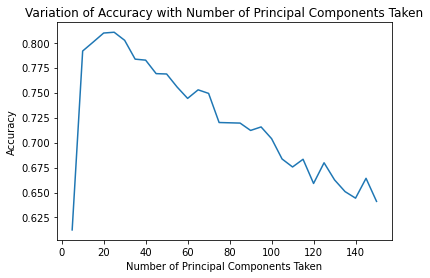

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

accuracy=[]
pcs_taken=[]
for i in range(30):
    pcs_taken.append((i+1)*5)
    
for i in range(len(pcs_taken)):

    train_dataset=pd.read_csv('/kaggle/input/mnist-testing/train.csv')
    
    y=train_dataset.iloc[:,0].values
    x=train_dataset.iloc[:,1:].values
    
    from sklearn.decomposition import PCA
    pca=PCA(n_components=pcs_taken[i])
    datavar=pca.fit_transform(x)
    
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    normalized_datavar = sc.fit_transform(datavar)
    
    from sklearn.preprocessing import StandardScaler
    sc = StandardScaler()
    normalized_datavar = sc.fit_transform(datavar)
    
    from sklearn.model_selection import train_test_split
    x_train, x_test, y_train, y_test = train_test_split(normalized_datavar, y, test_size = 1/3, random_state = 0)
    
    y_train_values=[]
    for i in range(10):
        train_values=[]
        for value in y_train:
            if(value==i):
                train_values.append(1)
            else:
                train_values.append(0)
        y_train_values.append(train_values)
    y_test_values=[]
    for i in range(10):
        test_values=[]
        for value in y_test:
            if(value==i):
                test_values.append(1)
            else:
                test_values.append(0)
        y_test_values.append(test_values)
        
    from sklearn.ensemble import RandomForestClassifier
    classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
    y_pred_values=[]
    for i in range(10): 
        classifier.fit(x_train, y_train_values[i])
        y_pred_values.append(classifier.predict(x_test))
    
    y_pred=[]
    for i in range(len(y_pred_values[0])):
        numbers=[]
        for j in range(10):
            if(y_pred_values[j][i]==1):
                numbers.append(j)
        if(len(numbers)==0):
            numbers.append(-1)
        y_pred.append(numbers)
        
    num_correct=0 
    for i in range(len(y_test)):
        if(len(y_pred[i])==1 and y_pred[i][0]==y_test[i]):
            num_correct=num_correct+1
            
    print(num_correct/len(y_test))
    accuracy.append(num_correct/len(y_test))

plt.plot(pcs_taken,accuracy)
plt.title('Variation of Accuracy with Number of Principal Components Taken')
plt.xlabel('Number of Principal Components Taken')
plt.ylabel('Accuracy')
plt.show()

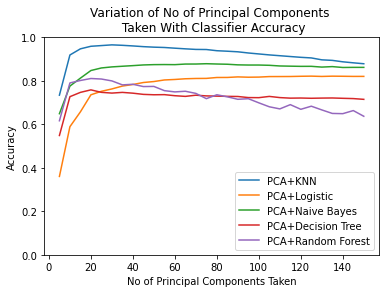

In [11]:
import matplotlib.pyplot as plt

pca_knn=[0.7341428571428571, 0.9189285714285714, 0.9472142857142857, 0.959 ,0.9622142857142857, 0.9655, 0.9634285714285714, 0.9605714285714285, 0.9572857142857143, 0.9549285714285715, 0.9534285714285714, 0.9502142857142857, 0.9472142857142857, 0.9445714285714286, 0.9440714285714286, 0.9385714285714286, 0.9362857142857143, 0.9335714285714286, 0.9281428571428572, 0.9237142857142857, 0.9192857142857143, 0.9155714285714286, 0.9118571428571428, 0.9082142857142858, 0.9054285714285715, 0.8966428571428572, 0.8941428571428571, 0.8875714285714286, 0.8829285714285714, 0.8786428571428572]
pca_logistic=[0.36042857142857143,0.5891428571428572,0.6574285714285715,0.7358571428571429,0.7519285714285714,0.7627857142857143,0.776, 0.7832142857142858,0.7923571428571429,0.7967857142857143,0.8040714285714285,0.8063571428571429,0.8095714285714286,0.8109285714285714,0.8112857142857143,0.8154285714285714,0.8156428571428571,0.8181428571428572,0.8167142857142857,0.8172857142857143,0.8196428571428571,0.8197857142857143,0.82,0.821,0.8216428571428571,0.8202857142857143,0.8215,0.8210714285714286, 0.8204285714285714, 0.8205]
pca_nb=[0.6490714285714285,0.7758571428571429,0.8124285714285714,0.8475,0.8592857142857143,0.8641428571428571,0.8671428571428571,0.87,0.8731428571428571,0.8745714285714286,0.8749285714285714,0.8745,0.8772142857142857,0.8773571428571428,0.8787857142857143,0.8774285714285714,0.8763571428571428,0.8735714285714286,0.8727142857142857,0.8727142857142857,0.8715,0.8684285714285714,0.8675,0.8666428571428572,0.8667857142857143,0.8632857142857143,0.8655,0.8615,0.862,0.862]
pca_dt=[0.5487142857142857,0.7272142857142857,0.747,0.7585,0.7471428571428571,0.7437142857142857,0.7469285714285714,0.7432857142857143,0.7377857142857143,0.736,0.7365714285714285,0.7316428571428572,0.7285714285714285,0.734,0.7307857142857143,0.7297142857142858,0.7286428571428571,0.7280714285714286,0.7230714285714286,0.7226428571428571,0.7284285714285714,0.723,0.7204285714285714,0.721,0.7198571428571429,0.7207142857142858,0.7212142857142857,0.7197142857142858,0.7184285714285714,0.7149285714285715]
pca_rf=[0.6165,0.7904285714285715,0.8016428571428571,0.8107857142857143,0.8083571428571429,0.7997142857142857,0.7814285714285715,0.7842142857142858,0.7737142857142857,0.7743571428571429,0.7549285714285714,0.7491428571428571,0.7521428571428571,0.7422857142857143,0.7180714285714286,0.736,0.7265714285714285,0.7151428571428572,0.7179285714285715,0.6988571428571428,0.6807142857142857,0.671,0.6905714285714286,0.6691428571428572,0.6834285714285714,0.6663571428571429,0.6501428571428571,0.6490714285714285,0.6632857142857143,0.6370714285714286]

pcs_taken=[]
for i in range(30):
    pcs_taken.append((i+1)*5)

plt.plot(pcs_taken,pca_knn,label='PCA+KNN')
plt.plot(pcs_taken,pca_logistic,label='PCA+Logistic')
plt.plot(pcs_taken,pca_nb,label='PCA+Naive Bayes')
plt.plot(pcs_taken,pca_dt,label='PCA+Decision Tree')
plt.plot(pcs_taken,pca_rf,label='PCA+Random Forest')
plt.title('Variation of No of Principal Components \n Taken With Classifier Accuracy')
plt.xlabel('No of Principal Components Taken')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim(0,1)
plt.show()